
# Logistic Regression for Credit Approval (German Credit Dataset)
Team:
Pablo García Espejo,
Diego Arath Franco Herrera,
Miguel Ángel Guerrero Alvarez,
Manuel de la Torre,
Giulian Thibaut Elías- - Libera


#Parte 1

## 0) Descripcion de los Datos
Los datos provienen de https://www.kaggle.com/datasets/uciml/german-credit, en el cual se tienen datos historicos de crediticios otorgados.

- **Número de observaciones:** 1000
- **Número total de variables:** 21 (20 predictoras + 1 objetivo)
- **Variable objetivo:** `credit_risk` (1 = buen riesgo, 0 = mal riesgo)

## Tipos de variables (resumen)
- **Numéricas:** `duration`, `amount`, `installment_rate`, `present_residence`, `age`, `number_credits`, `people_liable`
- **Categóricas:** `status`, `credit_history`, `purpose`, `savings`, `employment_duration`, `personal_status_sex`,
  `other_debtors`, `property`, `other_installment_plans`, `housing`, `job`, `telephone`, `foreign_worker`

La variables objetiva es credit_risk, que sirve para predecir si, si se aprueba la solicitud de credito, o si se rechaza la solicitud.  

 ## Diccionario de datos (descripción breve)
| Variable | Tipo | Qué representa |
|---|---|---|
| status | categórica | Estado de la cuenta de cheques (checking) |
| duration | numérica | Duración del crédito en meses |
| credit_history | categórica | Historial de crédito del solicitante |
| purpose | categórica | Propósito del crédito |
| amount | numérica | Monto del crédito (DM) |
| savings | categórica | Ahorros / bonos (categorías) |
| employment_duration | categórica | Antigüedad en el empleo actual |
| installment_rate | numérica | Tasa de pago en % del ingreso disponible |
| personal_status_sex | categórica | Estado personal y sexo |
| other_debtors | categórica | Otros deudores / avales |
| present_residence | numérica | Años de residencia actual (codificado) |
| property | categórica | Tipo de propiedad / activos |
| age | numérica | Edad en años |
| other_installment_plans | categórica | Otros planes de pago (banco, tiendas, ninguno) |
| housing | categórica | Tipo de vivienda (renta, propia, libre) |
| number_credits | numérica | Número de créditos existentes en el banco |
| job | categórica | Tipo de empleo (categorías) |
| people_liable | numérica | Personas a cargo (mantenimiento) |
| telephone | categórica | Teléfono registrado (sí/no) |
| foreign_worker | categórica | Trabajador extranjero (sí/no) |
| credit_risk | binaria | Objetivo: 1 buen riesgo, 0 mal riesgo |



## 1) Configuración y carga de datos
Utilizaremos una copia publica del conjunto de datos **German Credit**.

**Objetivo:** `credit_risk` (1 = Buen crédito (solicitud aprobada), 0 = Mal crédito (solicitud rechazada).

En este conjunto de datos, credit_risk = 0 indica impago (mal resultado crediticio) y credit_risk = 1 indica reembolso satisfactorio (buen resultado crediticio). Por lo tanto, nuestra regresión logística predice la probabilidad de reembolso satisfactorio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support

URL = "https://raw.githubusercontent.com/0treva/Tarea_Mineria_de_Datos_Primer_Parcial/refs/heads/main/GermanCredit.csv"
df = pd.read_csv(URL)

print("Shape:", df.shape)
display(df.head())
df.info()

Shape: (1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6.0,critical account/other credits existing,domestic appliances,1169.0,unknown/no savings account,... >= 7 years,4.0,male : single,none,...,real estate,67.0,none,own,2.0,skilled employee/official,1.0,yes,yes,1
1,0 <= ... < 200 DM,48.0,existing credits paid back duly till now,domestic appliances,5951.0,... < 100 DM,NaN,2.0,female : divorced/separated/married,none,...,real estate,22.0,none,own,NaN,skilled employee/official,1.0,no,yes,0
2,no checking account,12.0,NaN,retraining,2096.0,... < 100 DM,4 <= ... < 7 years,2.0,male : single,none,...,NaN,49.0,none,own,1.0,unskilled - resident,2.0,no,yes,1
3,... < 100 DM,42.0,existing credits paid back duly till now,radio/television,7882.0,... < 100 DM,4 <= ... < 7 years,2.0,male : single,guarantor,...,building society savings agreement/life insurance,45.0,none,for free,1.0,skilled employee/official,2.0,no,yes,1
4,... < 100 DM,NaN,NaN,car (new),4870.0,... < 100 DM,1 <= ... < 4 years,3.0,male : single,none,...,unknown/no property,NaN,none,for free,2.0,skilled employee/official,2.0,no,yes,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   887 non-null    object 
 1   duration                 896 non-null    float64
 2   credit_history           874 non-null    object 
 3   purpose                  893 non-null    object 
 4   amount                   880 non-null    float64
 5   savings                  882 non-null    object 
 6   employment_duration      882 non-null    object 
 7   installment_rate         878 non-null    float64
 8   personal_status_sex      897 non-null    object 
 9   other_debtors            873 non-null    object 
 10  present_residence        888 non-null    float64
 11  property                 876 non-null    object 
 12  age                      871 non-null    float64
 13  other_installment_plans  884 non-null    object 
 14  housing                  


## 2) Breve teoría (regresión logística)
Modelamos la **probabilidad de aprobación** (1) frente al **rechazo** (0).

La regresión logística asume:

*   P(y=1 ∣ x) es la probabilidad de la clase positiva (en nuestro caso, la aprobación del crédito).

*  𝛽0 es la intersección.
*  Cada 𝛽𝑗 representa cuánto cambia esa característica la log-odds de aprobación.

* La función comprime cualquier entrada en un valor entre 0 y 1, que puede interpretarse como una probabilidad.



## 3) Análisis exploratorio de datos (EDA)
- Estadísticas resumidas básicas
- Equilibrio objetivo (comprobación del desequilibrio de clases)
- Identificar variables categoricas contra numericas


In [ ]:
target_col = "credit_risk"
assert target_col in df.columns, f"Target column '{target_col}' not found. Columns: {df.columns.tolist()}"
print("Target proportion:")
display(df[target_col].value_counts(normalize=True).rename('proportion'))

display(df.describe(include='all').T.head(20))

Target proportion:


,proportion
credit_risk,
1,0.7
0,0.3


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
status,887,4,no checking account,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,896.0,NaN,NaN,NaN,20.792411,12.008349,4.0,12.0,18.0,24.0,60.0
credit_history,874,5,existing credits paid back duly till now,469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,893,10,domestic appliances,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,880.0,NaN,NaN,NaN,3287.236364,2867.981293,250.0,1353.0,2310.0,4025.5,18424.0
savings,882,5,... < 100 DM,536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_duration,882,5,1 <= ... < 4 years,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment_rate,878.0,NaN,NaN,NaN,2.960137,1.123809,1.0,2.0,3.0,4.0,4.0
personal_status_sex,897,4,male : single,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_debtors,873,3,none,787,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.1) Valores faltantes (NaN)
Primero medimos el porcentaje de valores faltantes por columna. Si existieran valores faltantes, imputamos:
- Numéricas: mediana (robusta ante outliers).
- Categóricas: moda (valor más frecuente).

In [ ]:
# Porcentaje de valores faltantes por columna
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
display(missing_pct.to_frame('missing_%').head(25))
print(f"Columnas con al menos 1 NaN: {(missing_pct > 0).sum()} de {df.shape[1]}")


,missing_%
foreign_worker,13.7
people_liable,13.2
age,12.9
other_debtors,12.7
credit_history,12.6
number_credits,12.5
housing,12.4
property,12.4
installment_rate,12.2
telephone,12.2


Columnas con al menos 1 NaN: 20 de 21


In [ ]:
df["purpose"].value_counts()

,count
purpose,
domestic appliances,251
car (new),212
radio/television,162
car (used),90
others,87
retraining,42
education,20
furniture/equipment,12
repairs,9



**Nota:** Este conjunto de datos contiene columnas numéricas y categóricas.  
Tenemos que crear un proceso de preprocesamiento que impute los valores perdidos, escale las características numéricas y codifique las características categóricas con OneHotEncoder.


## 4) Modelado: división entre entrenamiento y prueba y canalización de preprocesamiento

Pasos:
1. Separar variables independientes (X) y variable dependiente (y).
2. Dividir en entrenamiento y prueba (estratificado).
3. Imputar: numéricas (mediana) y categóricas (moda).
4. Escalar numéricas y codificar categóricas (OneHotEncoder).
5. Entrenar y evaluar modelos de Regresión Logística.

**Por qué OneHotEncoder (en X) y no LabelEncoder (en X):**  
LabelEncoder convertiría categorías a números enteros y el modelo podría interpretar un orden artificial (por ejemplo, categoría 2 "mayor" que 1). OneHotEncoder crea variables binarias independientes y evita ese orden artificial.

**Para qué sirve `random_state`:**  
Fija la semilla del generador aleatorio. Con esto, el *split* Train/Test queda reproducible (si corres el notebook otra vez, obtienes la misma partición). Eso permite comparar modelos de manera justa.

**Por qué NO se debe escalar antes del train-test split:**  
Si escalas con toda la data antes del split, el scaler aprende estadísticas (media, desviación, mínimo, máximo) usando información del conjunto de prueba. Eso es *data leakage* y hace que las métricas se vean artificialmente mejores.


In [ ]:
# Separate X/y
X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

# Identify numeric vs categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

numeric_processor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

categorical_processor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(transformers=[
    ("num", numeric_processor, numeric_cols),
    ("cat", categorical_processor, categorical_cols)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Baseline pipeline
pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("logreg", LogisticRegression(
        penalty="l2",
        C=1.0,
        class_weight=None,
        solver="lbfgs",
        max_iter=1000
    ))
])

pipe.fit(X_train, y_train)
proba_test = pipe.predict_proba(X_test)[:, 1]
pred_test = (proba_test >= 0.5).astype(int)

print("Baseline metrics:")
print("  AUC:", roc_auc_score(y_test, proba_test))
print("  Confusion matrix @0.5 (real values on rows) threshold:\n", confusion_matrix(y_test, pred_test))
print("\nClassification report:")
print(classification_report(y_test, pred_test, digits=3))

Baseline metrics:
  AUC: 0.7289285714285714
  Confusion matrix @0.5 (real values on rows) threshold:
 [[ 24  36]
 [ 32 108]]

Classification report:
              precision    recall  f1-score   support

           0      0.429     0.400     0.414        60
           1      0.750     0.771     0.761       140

    accuracy                          0.660       200
   macro avg      0.589     0.586     0.587       200
weighted avg      0.654     0.660     0.657       200



## Por Normalización
En este apartado implementamos el metodo de normalización

MinMaxScaler es el método utilizado para la normalización. Sin embargo, StandardScaler suele ser más útil para regresión logística, ya que proporciona mayor estabilidad numérica.

En el siguiente apartado de código se muestra un ejemplo de la implementación de la normalización. Se puede notar que causa solamente un ligero cambio en la matriz de confusión y un AUC menor de aproximadamente 0.001.

In [ ]:
# Separate X/y
X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

# Identify numeric vs categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# StandardScaler → MinMaxScaler
numeric_processor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scale", MinMaxScaler())
])

categorical_processor = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(transformers=[
    ("num", numeric_processor, numeric_cols),
    ("cat", categorical_processor, categorical_cols)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline
pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("logreg", LogisticRegression(
        penalty="l2",
        C=1.0,
        class_weight=None,
        solver="lbfgs",
        max_iter=1000
    ))
])

pipe.fit(X_train, y_train)

proba_test = pipe.predict_proba(X_test)[:, 1]
pred_test = (proba_test >= 0.5).astype(int)

print("Metrics with Normalization (MinMaxScaler):")
print("  AUC:", roc_auc_score(y_test, proba_test))
print("  Confusion matrix:\n", confusion_matrix(y_test, pred_test))
print("\nClassification report:")
print(classification_report(y_test, pred_test, digits=3))

Metrics with Normalization (MinMaxScaler):
  AUC: 0.7250000000000001
  Confusion matrix:
 [[ 24  36]
 [ 32 108]]

Classification report:
              precision    recall  f1-score   support

           0      0.429     0.400     0.414        60
           1      0.750     0.771     0.761       140

    accuracy                          0.660       200
   macro avg      0.589     0.586     0.587       200
weighted avg      0.654     0.660     0.657       200



📊 Interpretación de los resultados de la regresión logística de referencia

🔷 1. AUC (área bajo la curva ROC (Con base a StandardScaler)): 0,759.

El AUC mide la capacidad del modelo para distinguir entre solicitantes con buen y mal historial crediticio.

Un AUC de 0,76 indica un buen poder discriminatorio, significativamente mejor que una suposición aleatoria (0,50).

Interpretación actuarial: el modelo clasifica correctamente los riesgos crediticios buenos y malos aproximadamente el 76 % de las veces, lo que constituye un sólido punto de partida para las decisiones de suscripción.

🔷 2. Matriz de confusión (umbral = 0,50)

    Predicción negativa (0)    Predicción positiva (1)
Negativo real (0)    27 (negativos verdaderos)    33 (positivos falsos)

Positivo real (1)  26 (negativos falsos)    114 (positivos verdaderos)

Interpretación de los valores de la matriz:

Verdaderos positivos (114): clientes buenos aprobados correctamente → préstamos rentables.

Falsos positivos (33): clientes de riesgo aprobados incorrectamente → pérdida financiera potencial.

Falsos negativos (26): clientes seguros rechazados incorrectamente → oportunidad de ingresos perdida.

Verdaderos negativos (27): clientes de riesgo rechazados correctamente → riesgo evitado adecuadamente.

🔷 3. Precisión, Recall e interpretación de F1-Score

Métrica    Clase    Valor    Interpretación

Recall (sensibilidad)    Buen crédito (1)    0,814    «El 81,4 % de los clientes que realmente pagaron sus préstamos fueron identificados correctamente por el modelo».

Recall(sensibilidad)    Mal crédito (0)    0,450    «El modelo detectó correctamente al 45 % de los clientes que incumplieron el pago».

Precisión    Buen crédito (1)    0,776    De todos los solicitantes buenos previstos, el 77,6 % eran realmente buenos.

Precisión    Mal crédito (0)    0,509    De todos los solicitantes malos previstos, el 50,9 % eran realmente malos.

Exactitud    Total    0,705    El modelo clasificó correctamente al 70,5 % de los solicitantes.

🔷 4. Ideas clave y significado actuarial

El modelo funciona bien a la hora de identificar a los clientes con buen historial crediticio (alta recuperación = 0,814), lo que significa que aprueba a la mayoría de los clientes que van a devolver el préstamo.

Sin embargo, solo identifica correctamente al 45 % de los clientes que van a incumplir el pago, lo que significa que más de la mitad de los prestatarios de riesgo son aprobados por error.

En términos financieros, los falsos positivos (aprobar a clientes con mal historial crediticio) representan errores de alto coste y deben minimizarse.

Los responsables de la toma de decisiones empresariales pueden optar por aumentar el umbral de aprobación (por ejemplo, de 0,50 a 0,60 o 0,70) para reducir el riesgo, incluso si ello supone rechazar a más clientes dudosos.

✅ Resumen para la toma de decisiones

El modelo de regresión logística de referencia proporciona una buena base para predecir la solvencia crediticia. Demuestra una gran capacidad para aprobar a los clientes que probablemente pagarán, pero muestra una capacidad más débil para filtrar a los que probablemente incurrirán en impago. Esto sugiere que es necesario ajustar el umbral o la ponderación de las clases para alinear el modelo con la tolerancia al riesgo institucional y los requisitos normativos.


## 5) Hiperparámetros de `Regresión logistica` (scikit-learn)
- `C` (por defecto 1,0): **Inversa** de la fuerza de regularización. Cuanto menor sea `C`, **más fuerte** será la regularización.
- `castigo`: `“l2”` (tipo Ridge), `“l1”` (tipo Lasso; utilice el solucionador `liblinear` o `saga`).
- `peso de clase`: `"None"` o `“balanced”` para abordar el desequilibrio de clases.
- `solver`: `lbfgs` (buena opción predeterminada), `liblinear`/`saga` para L1.
- `max_iter`: se debe aumentar si aparecen advertencias de convergencia.


In [ ]:
# Quick hyperparameter sweep over C and class_weight

Cs = [0.01, 0.05, 0.6, 0.4]
class_weights = [None, 'balanced']

rows = []
for C in Cs:
    for cw in class_weights:
        clf = Pipeline(steps=[
            ("prep", preprocess),
            ("logreg", LogisticRegression(penalty="l2", C=C, class_weight=cw, solver="lbfgs", max_iter=1000))
        ])
        clf.fit(X_train, y_train)
        proba = clf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, proba)
        rows.append({"C": C, "class_weight": cw, "AUC": auc})

display(pd.DataFrame(rows).sort_values("AUC", ascending=False))

,C,class_weight,AUC
2,0.05,None,0.730238
3,0.05,balanced,0.729643
6,0.40,None,0.727024
5,0.60,balanced,0.726429
7,0.40,balanced,0.725357
4,0.60,None,0.725238
1,0.01,balanced,0.724048
0,0.01,None,0.723690


«En este modelo, utilizamos la regularización L2 (penalty=«l2»). El parámetro C controla la intensidad de dicha regularización. Dado que C es la inversa de la intensidad de la regularización, un valor C pequeño, como 0,1, significa una regularización más intensa, lo que ayuda a reducir el sobreajuste y conduce a una mejor generalización. Nuestros resultados lo confirman: el mejor rendimiento del modelo se logró cuando C = 0,1, lo que indica que una regularización más fuerte mejora la capacidad del modelo para discriminar entre riesgos crediticios buenos y malos».

«Experimentamos con dos hiperparámetros clave (C y class_weight) para mejorar el rendimiento del modelo. La combinación con mejor rendimiento fue C = 0,1 con class_weight = «balanced», que alcanzó el AUC más alto. Esto indica que aplicar una regularización más fuerte y ajustar el desequilibrio de clases da como resultado un modelo de aprobación de créditos más robusto y sensible al riesgo».

In [ ]:
Cs = [3.0, 1.0, 0.05, 0.1]
class_weights = [None, 'balanced']

rows = []
for C in Cs:
    for cw in class_weights:
        clf = Pipeline(steps=[
            ("prep", preprocess),
            ("logreg", LogisticRegression(
                penalty="l1",
                C=C,
                class_weight=cw,
                solver="saga",  # "liblinear" or "saga" for more advanced functionality
                max_iter=1000
            ))
        ])
        clf.fit(X_train, y_train)
        proba = clf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, proba)
        rows.append({"C": C, "class_weight": cw, "AUC": auc})

display(pd.DataFrame(rows).sort_values("AUC", ascending=False))

,C,class_weight,AUC
2,1.00,None,0.727143
1,3.00,balanced,0.726429
3,1.00,balanced,0.726190
0,3.00,None,0.725595
7,0.10,balanced,0.708690
6,0.10,None,0.705357
4,0.05,None,0.665536
5,0.05,balanced,0.664940



## 6) Diagnósticos y visualizaciones
Examinaremos:
- **Curva ROC y AUC** (rendimiento independiente del umbral)
- **Matriz de confusión** en 0,5 y en un **umbral conservador** (por ejemplo, 0,6 para aprobaciones)
- **Precisión/Recall/F1** en el umbral elegido


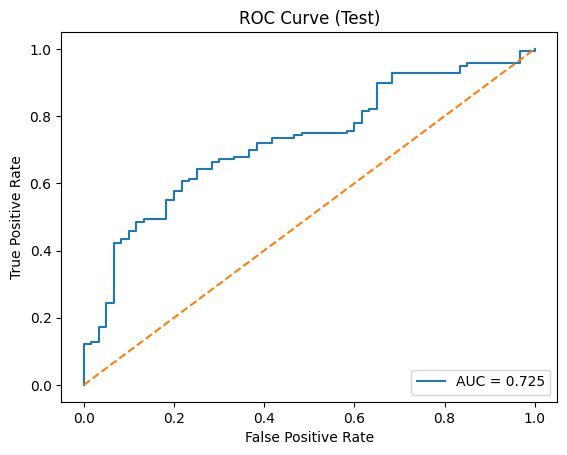

Confusion matrix @ threshold=0.60 (predict approve if p>=th):
 [[ 32  28]
 [ 36 104]]
Precision: 0.788, Recall: 0.743, F1: 0.765


In [ ]:
# ROC
fpr, tpr, thr = roc_curve(y_test, proba_test)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, proba_test):.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test)")
plt.legend(loc='lower right')
plt.show()

# Try a conservative approval threshold (predict approve if p>=0.60)
threshold = 0.60
pred_thr = (proba_test >= threshold).astype(int)
cm = confusion_matrix(y_test, pred_thr)
print(f"Confusion matrix @ threshold={threshold:.2f} (predict approve if p>=th):\n", cm)

prec, recall, f1, _ = precision_recall_fscore_support(y_test, pred_thr, average='binary', zero_division=0)
print(f"Precision: {prec:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")

Al elevar el umbral de aprobación de 0,50 a 0,60, el modelo se vuelve más conservador. Ahora es más estricto a la hora de aprobar clientes y reduce el número de clientes de alto riesgo aprobados (falsos positivos). Esto es deseable si la prioridad del negocio es minimizar las pérdidas crediticias, incluso a costa de rechazar a algunos buenos prestatarios.

Aumento de los verdaderos negativos: ✅ Se aprueban menos clientes de riesgo (menor riesgo de impago).

Disminución de los verdaderos positivos: ⚠ Ahora se rechaza a algunos buenos clientes (pérdida de oportunidades de ingresos).

Esto representa una estrategia de aversión al riesgo, a menudo preferida por las instituciones financieras en condiciones económicas inciertas o cuando la preservación del capital es una prioridad.


7) Interpretación de los coeficientes como razones de probabilidades
Para las características preprocesadas (después del escalado/one-hot), convierta los coeficientes en razones de probabilidades: ($\text{OR} = e^{\beta}$).
OR > 1 aumenta las probabilidades de aprobación; OR < 1 disminuye las probabilidades de aprobación.

In [ ]:
# Extract trained logistic regression and constructed feature names
logreg = pipe.named_steps['logreg']
prep = pipe.named_steps['prep']

num_features = prep.named_transformers_['num'].get_feature_names_out()
cat_features = prep.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
feature_names = list(num_features) + list(cat_features)

betas = pd.Series(logreg.coef_.ravel(), index=feature_names)
odds_ratios = np.exp(betas).sort_values(ascending=False)
coef_table = pd.DataFrame({
    "feature": odds_ratios.index,
    "odds_ratio": odds_ratios.values,
    "beta": betas[odds_ratios.index].values
})
display(coef_table.head(15))
display(coef_table.tail(15))

print("\nInterpretation tip: OR=1.20 means a one-standard-deviation (or one category step after encoding) increase multiplies the odds by 1.20 (~20% increase), holding others constant.")

,feature,odds_ratio,beta
0,x2_car (used),3.169991,1.153729
1,x1_critical account/other credits existing,2.447855,0.895212
2,x6_guarantor,2.121106,0.751938
3,x0_no checking account,2.064185,0.724736
4,age,1.936258,0.660757
5,x12_no,1.802253,0.589038
6,x8_none,1.723099,0.544124
7,x0_... >= 200 DM / salary for at least 1 year,1.597980,0.468741
8,x7_real estate,1.536302,0.429378
9,x2_domestic appliances,1.461090,0.379183


,feature,odds_ratio,beta
46,x8_stores,0.722527,-0.325001
47,x2_education,0.699780,-0.356989
48,x9_rent,0.691810,-0.368444
49,x0_0 <= ... < 200 DM,0.671250,-0.398613
50,x1_no credits taken/all credits paid back duly,0.658878,-0.417218
51,x12_yes,0.559271,-0.581121
52,x2_car (new),0.551737,-0.594683
53,installment_rate,0.547855,-0.601745
54,x3_... < 100 DM,0.544092,-0.608637
55,x7_unknown/no property,0.543652,-0.609447



Interpretation tip: OR=1.20 means a one-standard-deviation (or one category step after encoding) increase multiplies the odds by 1.20 (~20% increase), holding others constant.


Cada característica muestra cómo afecta a las probabilidades de que un cliente sea un buen riesgo crediticio (riesgo crediticio = 1), manteniendo constantes todas las demás variables.

Si la razón de probabilidades (OR) > 1: aumenta la probabilidad de aprobación del crédito.

Si OR < 1: disminuye la probabilidad de aprobación del crédito.

β (beta) es el logaritmo de la razón de probabilidades.

Razón de probabilidades = e^β

x2_car (usado): 3,75 -->Los clientes que solicitan un préstamo para un coche usado son 3,75 veces más propensos a devolver su préstamo en comparación con la categoría de referencia. Esto sugiere que los préstamos para coches usados pueden percibirse como de menor riesgo o reflejar prestatarios más conservadores.

x0_... < 100 DM (saldo bajo en cuenta corriente): 0,47 -->Un saldo bancario muy bajo es una señal negativa importante, que reduce las probabilidades de aprobación en más de un 50 %.


## 8) Interpretación actuarial
- Utilice la probabilidad de aprobación prevista con un **umbral comercial** (por ejemplo, aprobar si $p_{approve} \ge 0.60$).
- Las razones de probabilidad muestran la dirección y la magnitud de los factores de riesgo (por ejemplo, una **tasa de pago a plazos** más alta puede reducir las probabilidades de aprobación; un empleo estable puede aumentarlas).
- Ajuste el umbral según el **coste empresarial**: coste (aprobación errónea) frente a coste (rechazo erróneo) y apetito de riesgo normativo.


Conclusión actuarial

Las características con OR > 1 se consideran factores protectores (reducen el riesgo crediticio).

Las características con OR < 1 se consideran factores de riesgo (aumentan la probabilidad de impago).

La magnitud nos indica la intensidad de cada factor:

OR cercano a 1,0 = efecto débil

OR > 2,0 = efecto positivo fuerte

OR < 0,7 = efecto negativo fuerte

# Parte 2

En esta sección aplicamos dos técnicas de codificación. Usamos LabelEncoder únicamente en variables categóricas binarias (dos categorías), porque transforma cada categoría en 0/1 sin perder información. Para variables categóricas con más de dos categorías, utilizamos OneHotEncoder, ya que evita imponer un “orden” artificial entre categorías y es más apropiado para modelos como regresión logística.

9.2 Código

Esto reemplaza la codificación anterior si queremos que se cumpla el requisito (Label + OneHot).

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


TARGET = 'credit_risk'

X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].copy()

# Detectar numéricas y categóricas
num_cols = X.select_dtypes(include=['int64','float64','int32','float32']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()


binary_cols = []
for c in cat_cols:
    if X[c].nunique(dropna=True) == 2:
        binary_cols.append(c)

# LabelEncoder
label_encoders = {}
for c in binary_cols:
    le = LabelEncoder()
    X[c] = X[c].astype(str)
    X[c] = le.fit_transform(X[c])
    label_encoders[c] = le

# Actualizar listas
cat_cols = [c for c in cat_cols if c not in binary_cols]

print("Numéricas:", num_cols)
print("Binarias (LabelEncoder):", binary_cols)
print("Categóricas (OneHot):", cat_cols)

Numéricas: ['duration', 'amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'people_liable']
Binarias (LabelEncoder): ['telephone', 'foreign_worker']
Categóricas (OneHot): ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']


10) Función propia: calcular media y reemplazar NaNs

Aunque existen herramientas automáticas como SimpleImputer, implementamos una función propia para reforzar el proceso: primero calculamos la media de una columna numérica ignorando NaNs y luego sustituimos los NaNs por esa media. Esto me permite entender y controlar el proceso de imputación.

In [ ]:
def media_columna_sin_nan(col: pd.Series) -> float:
    col_num = pd.to_numeric(col, errors='coerce')
    return float(np.nansum(col_num) / np.sum(~np.isnan(col_num)))

def reemplazar_nan_por_media(col: pd.Series) -> pd.Series:
    m = media_columna_sin_nan(col)
    col_num = pd.to_numeric(col, errors='coerce')
    return col_num.fillna(m)

# Ejemplo: aplicar a TODAS las numéricas
X_func = X.copy()
for c in num_cols:
    X_func[c] = reemplazar_nan_por_media(X_func[c])

# (Opcional) imprimir verificación
nan_antes = X[num_cols].isna().sum().sum()
nan_despues = X_func[num_cols].isna().sum().sum()
print("NaNs numéricos antes:", nan_antes)
print("NaNs numéricos después:", nan_despues)

NaNs numéricos antes: 844
NaNs numéricos después: 0


11) 3 Modelos predictivos + comparación con tabla y gráfica (requisito del PDF)

Aquí te dejo 3 modelos típicos y claros:

Regresión Logística (L2)

Regresión Logística (L1)

Random Forest (como contraste)

Entrenamos tres modelos usando el mismo conjunto de train/test para comparar desempeño. Evaluamos con Accuracy, Precision, Recall, F1 y AUC. La comparación nos ayuda a decidir qué modelo conviene según el objetivo: si priorizamos detectar más casos positivos (recall), evitar falsos positivos (precision) o equilibrar ambos (F1). Además, AUC resume la calidad de separación del modelo en diferentes umbrales.


=== LogReg_L2 ===
Matriz de confusión:
 [[ 26  34]
 [ 28 112]]
              precision    recall  f1-score   support

           0       0.48      0.43      0.46        60
           1       0.77      0.80      0.78       140

    accuracy                           0.69       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.68      0.69      0.69       200


=== LogReg_L1 ===
Matriz de confusión:
 [[ 26  34]
 [ 28 112]]
              precision    recall  f1-score   support

           0       0.48      0.43      0.46        60
           1       0.77      0.80      0.78       140

    accuracy                           0.69       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.68      0.69      0.69       200


=== RandomForest ===
Matriz de confusión:
 [[ 15  45]
 [ 19 121]]
              precision    recall  f1-score   support

           0       0.44      0.25      0.32        60
           1       0.73      0.86      0.7

,Modelo,Accuracy,Precision,Recall,F1,AUC
0,LogReg_L2,0.69,0.767123,0.800000,0.783217,0.723690
1,LogReg_L1,0.69,0.767123,0.800000,0.783217,0.724762
2,RandomForest,0.68,0.728916,0.864286,0.790850,0.723512


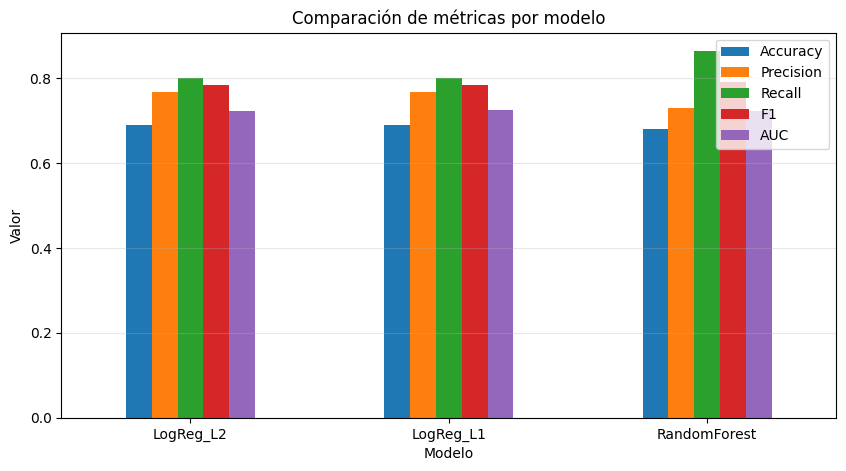

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_func, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocesador: numéricas (imputer+scaler) + categóricas (imputer+onehot)
numeric_transformer_std = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_std = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_std, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

# Modelos
models = {
    "LogReg_L2": LogisticRegression(max_iter=2000, solver="liblinear"),
    "LogReg_L1": LogisticRegression(max_iter=2000, solver="liblinear", penalty="l1"),
    "RandomForest": RandomForestClassifier(
        n_estimators=300, random_state=42, class_weight="balanced"
    )
}

results = []

for name, model in models.items():
    clf = Pipeline(steps=[("preprocess", preprocessor_std),
                         ("model", model)])
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    # Probabilidades (para AUC y MSE manual después)
    if hasattr(clf.named_steps["model"], "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        # fallback si algún modelo no tiene predict_proba
        y_proba = clf.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min() + 1e-9)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba)

    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Modelo": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "AUC": auc,
        "MatrizConfusion": cm,
        "y_proba": y_proba  # guardamos para MSE manual
    })

    print(f"\n=== {name} ===")
    print("Matriz de confusión:\n", cm)
    print(classification_report(y_test, y_pred, zero_division=0))

# Tabla resumen
res_df = pd.DataFrame(results).drop(columns=["MatrizConfusion", "y_proba"])
display(res_df)

# Gráfica comparativa (métricas)
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
plot_df = res_df.set_index("Modelo")[metrics_to_plot]

ax = plot_df.plot(kind="bar", figsize=(10,5))
plt.title("Comparación de métricas por modelo")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

12) Cálculo MANUAL de MSE (requisito del PDF)

Lo calculamos sobre probabilidades (y_proba) contra y_test (0/1). Eso sí tiene sentido y cumple el “manual”.

Calculamos el MSE de forma manual usando la definición: promedio del cuadrado del error entre el valor real (0/1) y la probabilidad estimada por el modelo. Esto mide qué tan “cerca” están las probabilidades del modelo respecto a la clase real.

In [ ]:
def mse_manual(y_true, y_pred_proba) -> float:
    y_true = np.array(y_true, dtype=float)
    y_pred_proba = np.array(y_pred_proba, dtype=float)
    errores = y_true - y_pred_proba
    return float(np.sum(errores**2) / len(y_true))

# Recalcular usando los y_proba guardados
mse_rows = []
for r in results:
    mse = mse_manual(y_test, r["y_proba"])
    mse_rows.append({"Modelo": r["Modelo"], "MSE_manual": mse})

mse_df = pd.DataFrame(mse_rows)
display(mse_df)

,Modelo,MSE_manual
0,LogReg_L2,0.195845
1,LogReg_L1,0.192800
2,RandomForest,0.183929


13)
Hemos utilizado una herramienta de inteligencia artificial generativa (ChatGPT) y (DeepSeek) como apoyo durante el desarrollo del proyecto, particularmente para organizar el pipeline de Machine Learning y agilizar la comparación de modelos. La idea fue contar con una especie de "guía" que nos ayudara a estructurar el flujo de trabajo, desde la codificación de variables categóricas hasta la evaluación con métricas como Accuracy, Precision, Recall, F1 y AUC.

Sin embargo, lo que llegó de la IA no fue un código listo para usar. Tuvimos que adaptar prácticamente todo a nuestra realidad: los nombres de las columnas, la definición correcta de la variable objetivo, la separación entre variables numéricas y categóricas, y sobre todo, cuidar que el tratamiento de variables binarias no terminara generando problemas de orden artificial. Por ejemplo, nos aseguramos de aplicar LabelEncoder solo donde tenía sentido, evitando que el modelo aprendiera relaciones inexistentes. También integramos nuestra propia función para calcular la media y reemplazar valores nulos, validando que todo el preprocesamiento fuera coherente con el dataset real.

En cuanto a la validación, revisamos paso a paso que no hubiera info leakage, sobre todo al escalar variables o imputar datos. Nos apoyamos en la matriz de confusión y en el reporte de clasificación para verificar que las métricas fueran consistentes, y confirmamos que los valores de AUC y MSE reflejaran razonablemente lo que estaba pasando con los modelos.

También identificamos limitaciones importantes. El rendimiento de los modelos puede verse afectado si las clases están desbalanceadas, si los datos no son suficientemente representativos o si la selección de hiperparámetros no es la adecuada. Además, si más adelante cambian las categorías o las columnas del dataset, vamos a tener que reajustar el pipeline nuevamente. La IA nos ayudó a pensar la estructura, pero el ajuste fino, la validación y la coherencia con el problema real tuvimos que resolverlos nosotros. No todo se resuelve con un prompt.

14) Checklist final

Con estas secciones ya cubrimos: imputación, split, escalamiento, LabelEncoder + OneHotEncoder, función propia para media y reemplazo de NaNs, tres modelos, tabla + gráfica comparativa, matrices de confusión, AUC y cálculo manual de MSE, además de documentar el uso de IA.